## Introduction
In this project, i am a data scientist working for a credit card company. The dataset contains information about the company’s clients and i am asked to help segment them into different groups in order to apply different business strategies for each type of customer.

## Objective
The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

- Analyze the dataset;
- Prepare the data for modeling;
- Find an appropriate number of clusters;
- Segment the data;
- Interpret and explain the results.

## Data Overview
The data we have at our disposal consists of various client-related information, and here's the description to help us understand it better:

- customer_id: unique identifier for each customer.
- age: customer age in years.
- gender: customer gender (M or F).
- dependent_count: number of dependents of each customer.
- education_level: level of education ("High School", "Graduate", etc.).
- marital_status: marital status ("Single", "Married", etc.).
- estimated_income: the estimated income for the customer projected by the data science team.
- months_on_book: time as a customer in months.
- total_relationship_count: number of times the customer contacted the company.
- months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
- credit_limit: customer's credit limit.
- total_trans_amount: the overall amount of money spent on the card by the customer.
- total_trans_count: the overall number of times the customer used the card.
- 
avg_utilization_ratio: daily average utilization ratio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Read the dataset
customers = pd.read_csv('customer_segmentation.csv')
print(customers.shape)
customers.head()

(10127, 14)


,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


We do not need customer_id for our analysis. The dataset has 10127 rows and 14 columns. 


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

- All columns have non-null values, indicating that there are no missing values in the dataset.
- The columns age, dependent_count, estimated_income, months_on_book, total_relationship_count, months_inactive_12_mon, credit_limit, total_trans_amount, total_trans_count, and avg_utilization_ratio are numerical variables, while the columns gender, education_level, and marital_status are categorical variables.
- The customer_id column is not useful for our analysis because it is just a unique identifier for each customer and does not provide any information about the customer's behavior or characteristics.

In [4]:
# Drop 'customer_id' from 'customers' dataframe
customers = customers.drop('customer_id', axis=1)

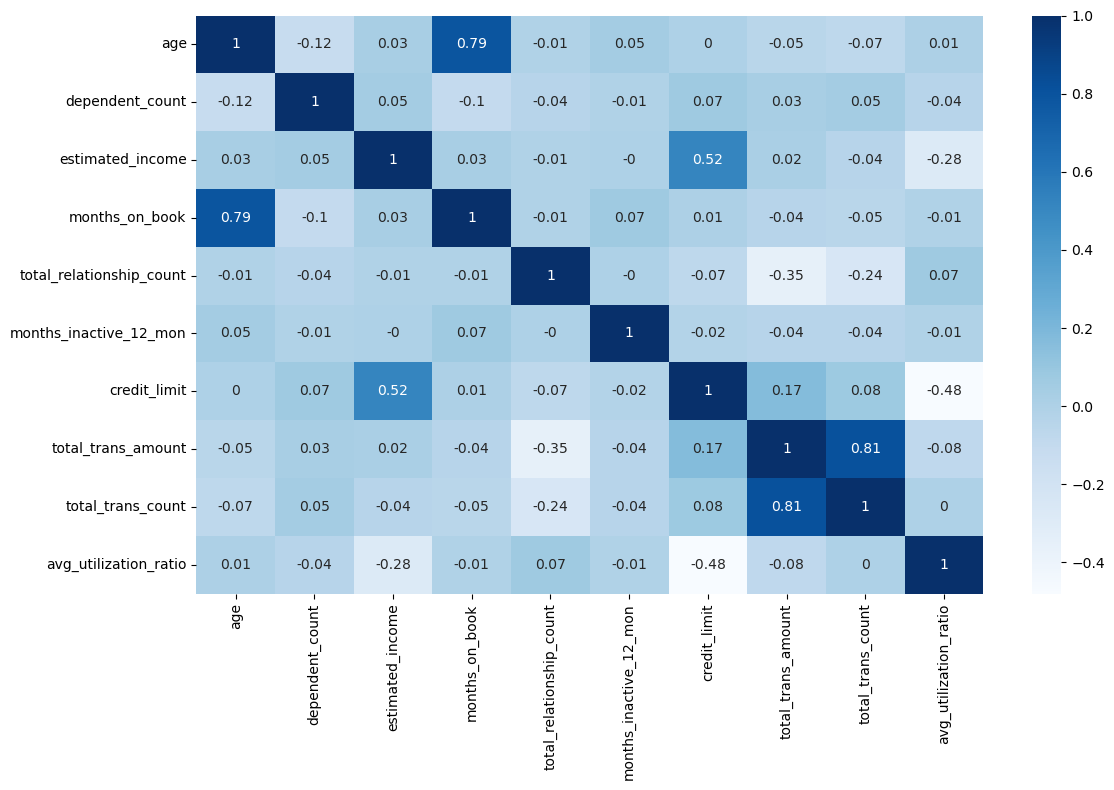

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(round(customers.corr(),2), annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

- Age is highly positively correlated with months_on_book, which suggests that the longer a customer has been with the bank, the older they are likely to be.
- Age is negatively correlated with dependent_count, indicating that older customers may have fewer dependents.
- Credit_limit is positively correlated with estimated_income, which is expected since higher income individuals are more likely to have a higher credit limit.
- Credit_limit is negatively correlated with avg_utilization_ratio, suggesting that customers with higher credit limits tend to use a lower percentage of their available credit.
- Total_trans_count and total_trans_amount are highly positively correlated, indicating that customers who make more transactions also tend to spend more money.

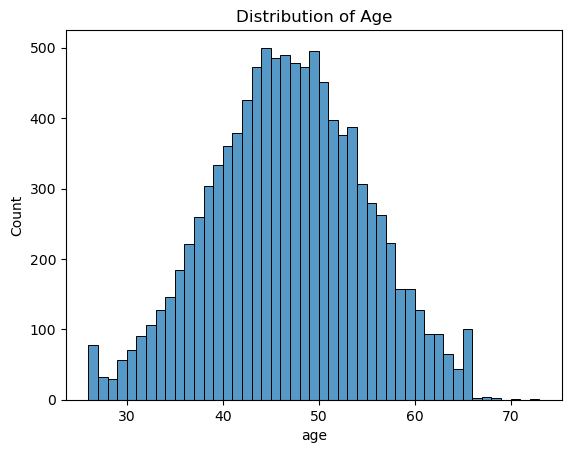

In [6]:
# Plot distribution of age column
sns.histplot(data=customers, x='age')
plt.title('Distribution of Age')
plt.show()

The distribution of age is bell shaped. wiht most of the people having age 45 to 50

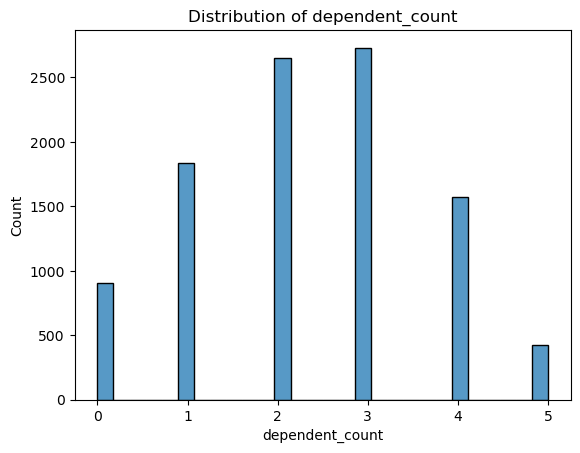

In [7]:
# Plot distribution of dependent_count column
sns.histplot(data=customers, x='dependent_count')
plt.title('Distribution of dependent_count')
plt.show()

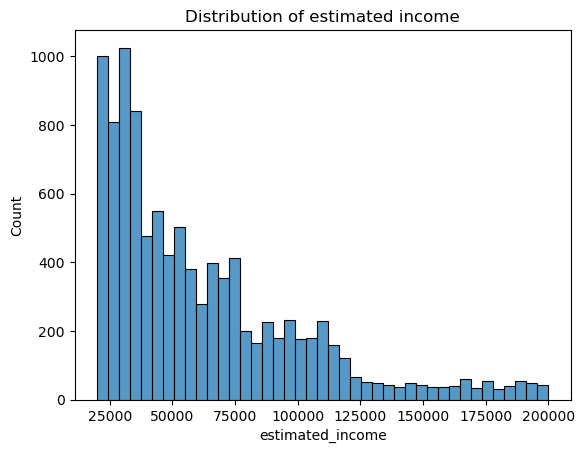

In [8]:
# Plot distribution of dependent_count column
sns.histplot(data=customers, x='estimated_income')
plt.title('Distribution of estimated income')
plt.show()

The shape of the distribution is right skewed. Majority of the people have income under 50k 

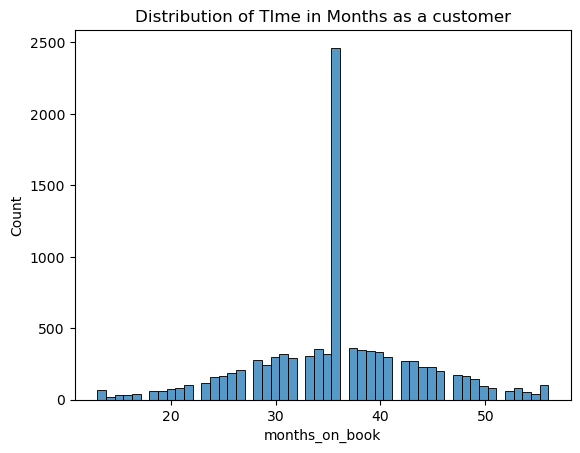

In [9]:
# Plot distribution of months_on_book
sns.histplot(data=customers, x='months_on_book')
plt.title('Distribution of TIme in Months as a customer')
plt.show()

The shape of the distribution is almost bellshaped except one big bar around 36 months. We need to further investgate this

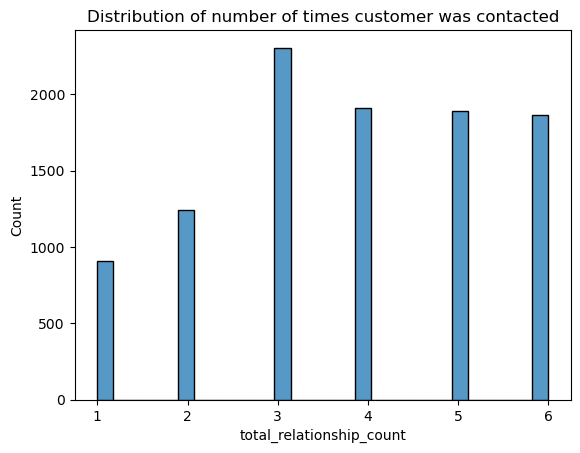

In [10]:
# Plot distribution of total_relationship_count
sns.histplot(data=customers, x='total_relationship_count')
plt.title('Distribution of number of times customer was contacted')
plt.show()

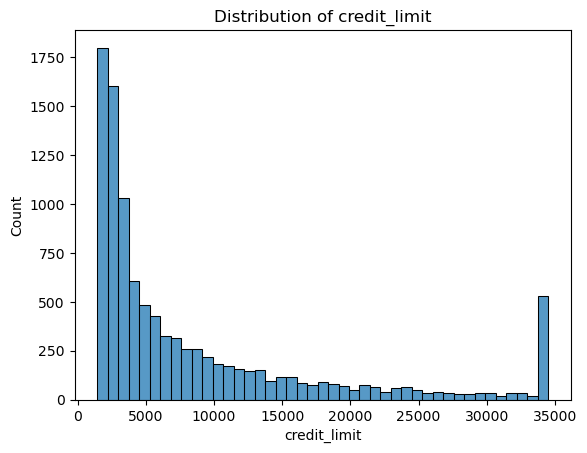

In [11]:
# Plot distribution of credit_limit column
sns.histplot(data=customers, x='credit_limit')
plt.title('Distribution of credit_limit')
plt.show()

The shape is skewed right. Many people are given credit limit of 5000 and then the graph decreases. There is however one big spike at around 34k

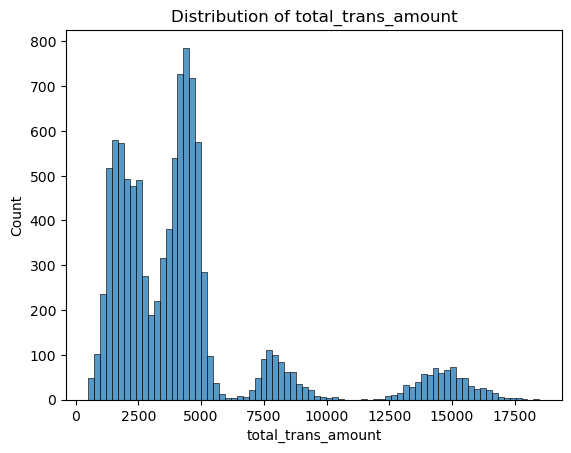

In [12]:
# Plot distribution of total_trans_amount column
sns.histplot(data=customers, x='total_trans_amount')
plt.title('Distribution of total_trans_amount')
plt.show()

The distribution is multi-modal. There seems to be 4 modals here with 4 different peaks.

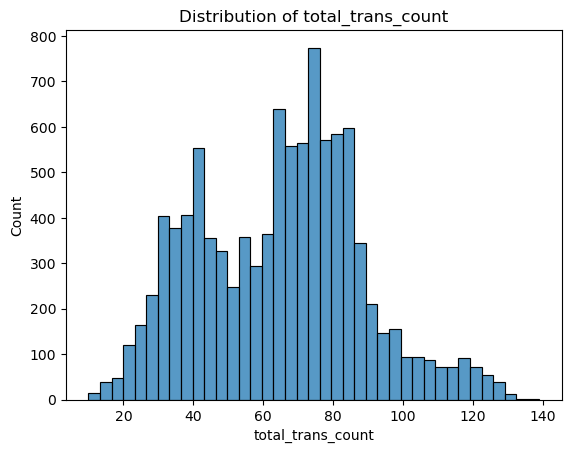

In [13]:
# Plot distribution of total_trans_count column
sns.histplot(data=customers, x='total_trans_count')
plt.title('Distribution of total_trans_count')
plt.show()

The distribution is seems to be multimodal where one peak at 40 and the other peak at around 70.

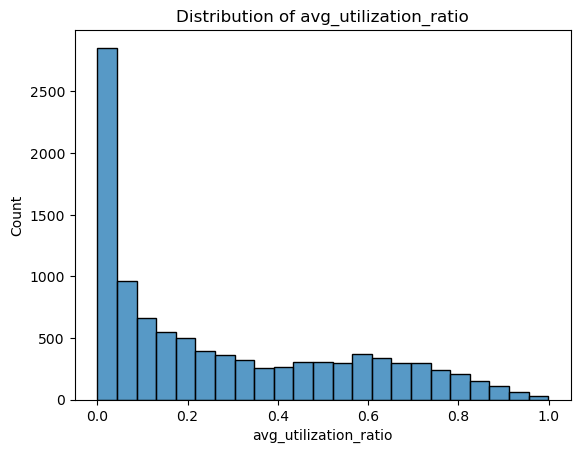

In [14]:
# Plot distribution of avg_utilization_ratio column
sns.histplot(data=customers, x='avg_utilization_ratio')
plt.title('Distribution of avg_utilization_ratio')
plt.show()

## Feature Engineering
The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

The education_level column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

I will replace the values in the education_level column in the order below.
- Uneducated - 0
- High School - 1
- College - 2
- Graduate - 3
- Post-Graduate - 4
- Doctorate - 5

The same can't be done to marital_status column as for the last categorical column because it can't be said that any of them is higher or better than the others therefore the variable cant be ranked. Therefore, i will use one-hot-encoding to create dummy variables from this column.

We will also make a copy of original dataframe.

In [15]:
#copy dataframe
customers_modif = customers.copy()

#replace gender column
customers_modif['gender'] = np.where(customers_modif['gender'] == 'M', 1, 0)

#replace education_level column
customers_modif['education_level'] = customers_modif['education_level'].map({'Uneducated': 0,
                                                                             'High School': 1,
                                                                             'College':2,
                                                                             'Graduate': 3,
                                                                             'Post-Graduate':4,
                                                                             'Doctorate':5})
# one_hot_encode the marital_status column
customers_modif = pd.get_dummies(data=customers_modif, columns = ['marital_status'], drop_first=True)

In [16]:
customers_modif

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,0,1,0
10123,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,0,0,0
10124,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,1,0,0
10125,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,0,0,1


## Scaling the Data
Note that we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale.

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(customers_modif)
X

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [18]:
X = pd.DataFrame(X, columns=customers_modif.columns)

## Choosing K

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

In [19]:
inertias = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    inertias.append(round(model.inertia_))
inertias

[151905, 134790, 123154, 112889, 104080, 98724, 94453, 91007, 88401, 86162]

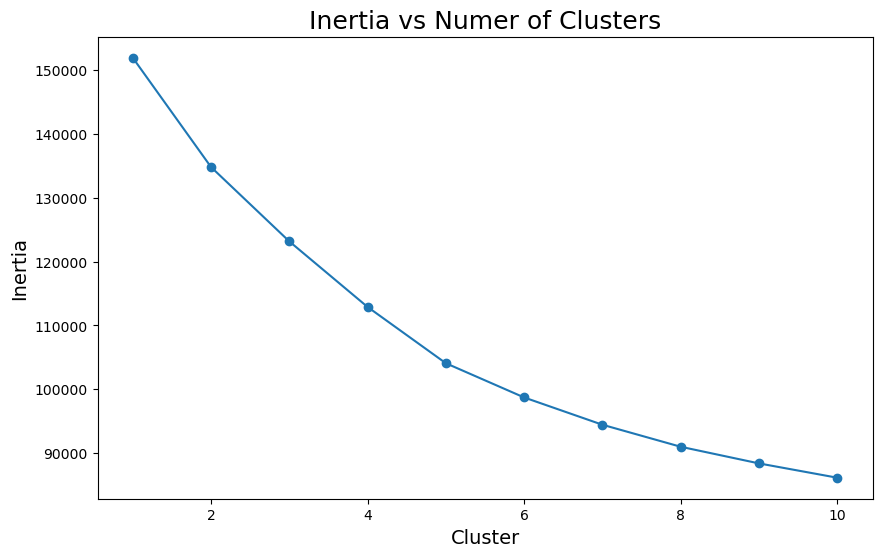

In [20]:
#Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Inertia vs Numer of Clusters', size=18)
plt.ylabel('Inertia', size=14)
plt.xlabel('Cluster', size=14)
plt.show()

The optimal number of clusters seems to be 5 because after the cluster number 5 the inertia diminishes at lower rate at the expense of complexity of model. The lower rate can be observed by seeing a flat line.<br>
<br>
Lets also visualize a bar plot to see the the difference better.

In [21]:
perct_decrease = []
for index, inertia in enumerate(inertias):
    if index > 0:
        perct_decrease.append(inertias[index-1] - inertias[index])
print(perct_decrease)

[17115, 11636, 10265, 8809, 5356, 4271, 3446, 2606, 2239]


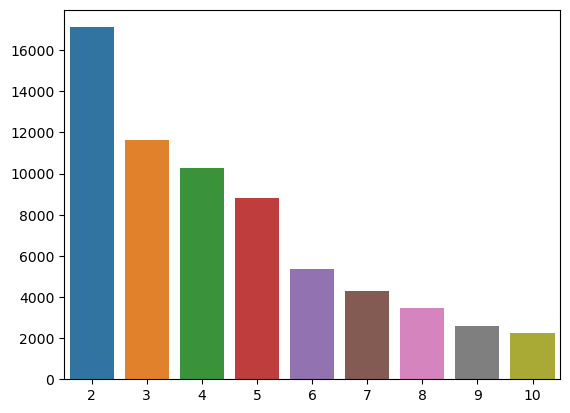

In [22]:
sns.barplot(x=[str(i) for i in range(2,11)], y=perct_decrease)
plt.show()

We can now be confident that the decrease is not steep when 6th cluster is formed. Therefore the best number of clusters are 5.

In [23]:
model = KMeans(n_clusters=5)
model.fit_predict(X)

array([2, 1, 2, ..., 4, 0, 4], dtype=int32)

## Analyzing Results

In [73]:
#Creating model with 5 clusters
model = KMeans(n_clusters=5)
clusters = model.fit_predict(X)
customers_modif['cluster'] = clusters
customers['cluster'] = clusters

In [25]:
#Differentiating numerical variable columns from categorical variable columns
num_vars = ['age','dependent_count', 'estimated_income', 'months_on_book', 'total_relationship_count',
       'months_inactive_12_mon', 'credit_limit', 'total_trans_amount',
       'total_trans_count', 'avg_utilization_ratio']
cat_vars = ['gender','education_level', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown']
customers_modif

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown,cluster
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0,3
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1,4
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,0,1,0,1
10123,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,0,0,0,3
10124,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,1,0,0,2
10125,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,0,0,1,4


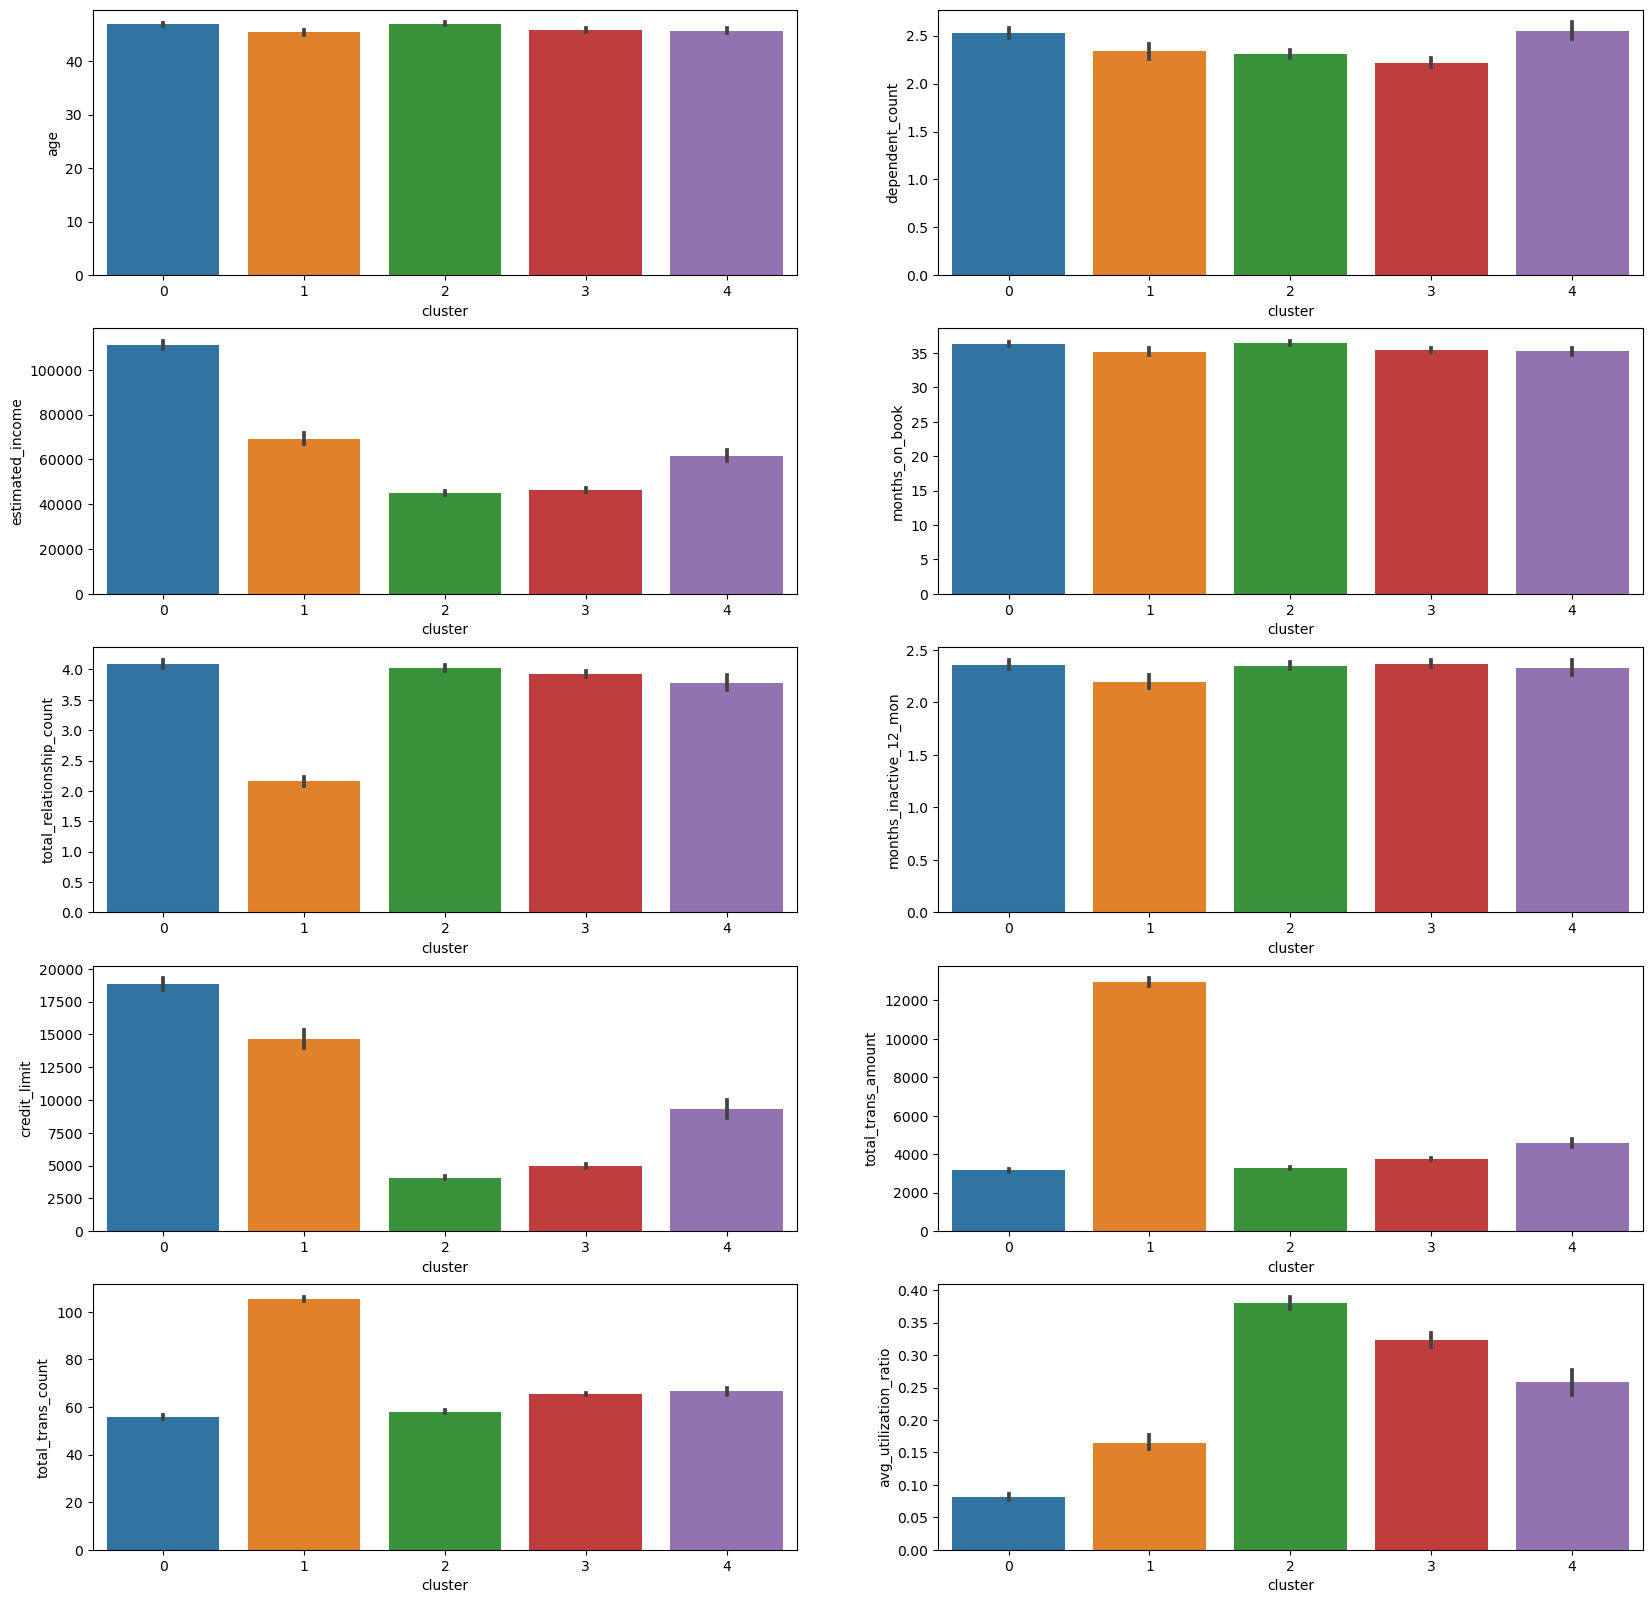

In [26]:
col_len = len(num_vars)
fig = plt.figure(figsize=(20,20))
for ind, var in enumerate(num_vars):
    ax = fig.add_subplot(5,2,ind+1)
    sns.barplot(data=customers_modif, x='cluster', y=var, ax=ax)
plt.show()

The observations for numerical columns are as follows:
- Age: All the clusters have a same average age of approximately 45

- Dependent Count: All the clusters has same avg number of dependents around 2.2 except cluster 3 and 4 which have avg dependent count of 2.5 

- Estimated Income: Cluster one and two have estimated income around 45k. Cluster 3 has the largest income of 110k and cluster 2 and 4 have estimated income of 70k and 60k

- Months on book: All the clusters have been customer of the bank for around an average of 36 months. There is no significant difference in this regard

- Total Relationship Count: Cluster 2 has been contacted around 2 times on average whereas cluster 0,1,3, and 4 have been contacted around 5 times. Since cluster 1 and 2 have income around 45k, they might not need to be contacted as often as cluster 3. Since cluster 3 and 2 have the highest incomes on avg they need to be contacted the most only. Also all the clusters have been loyal enough since all have been customers on average for a time of 36 months.

- Months inactive 12 Month: All the clusters have been inactive for almost the same period of time except cluster 2. This is interesting because they have been contacted the lowest too yet the inactive period is still low. Anyways the clusters other than 2 needs to be contacted more in order to decrease the inactive period. 

- Credit Limit: Credit limits are given in accordance to the average incomes. Higher limits are given to clusters who have higher estimated income. Cluster 3 has the highest credit limit followed by cluster 2, 4, 1, 0 which is in accordance of the estimated income. 

- Total Transaction Amount: The highest amount spent is by cluster 2 having spent more than 12k with income around 70k whereas cluster 3 spent around 3k having estimated income of 110k. This shows the big disparity in amount spent per income. Cluster 0 and 3 have spent around 3k whereas cluster 1 and 4 have spent around 4k. This shows that all the groups have spent lower amounts on their cards and this needs to be improved

- Total Transaction Count: The number of transactions are in accordance with total transaction amount. Cluster 3 have alomost double the transactions as compared to other clusters. This shows that cluster 2 uses the card two times as compared to other groups. The business can target clusters other than cluster two to increase transaction count. 

- Avg Utilization Ratio: Cluster 3 and 4 has lower daily utilization ratio as compared to other clusters. Cluster zero has the highest utlization ratio even having lower estimated income. This can be improved too for other groups.

The visualizations show that all clusters have approximately same age, months on book and months inactive. Cluster 0 and 1 have higher age, lower dependent count, income, credit limit, transaction amount, count and high average utlization ratio. These groups spends low, have lower income but daily utilization ratio is high. Cluster 2 has high spending, moderate income and credit limit. Cluster 3 has high income and credit limit but low spending. Cluster 4 has moderate income and credit limit but low spending and moderate utilization.

In [27]:
customers_modif.groupby('cluster').total_trans_amount.mean()

cluster
0     3156.611858
1    12955.360707
2     3264.597547
3     3749.795591
4     4590.452703
Name: total_trans_amount, dtype: float64

We'll use scatter plots to understand the distribution of variables between clusters, focusing on the highly correlated pairs of variables:

- `months on book` and `age`
- `total trans amount` and `total trans count`
- `estimated income` and `credit limit`
- `credit limit` and `avg utilization ratio`

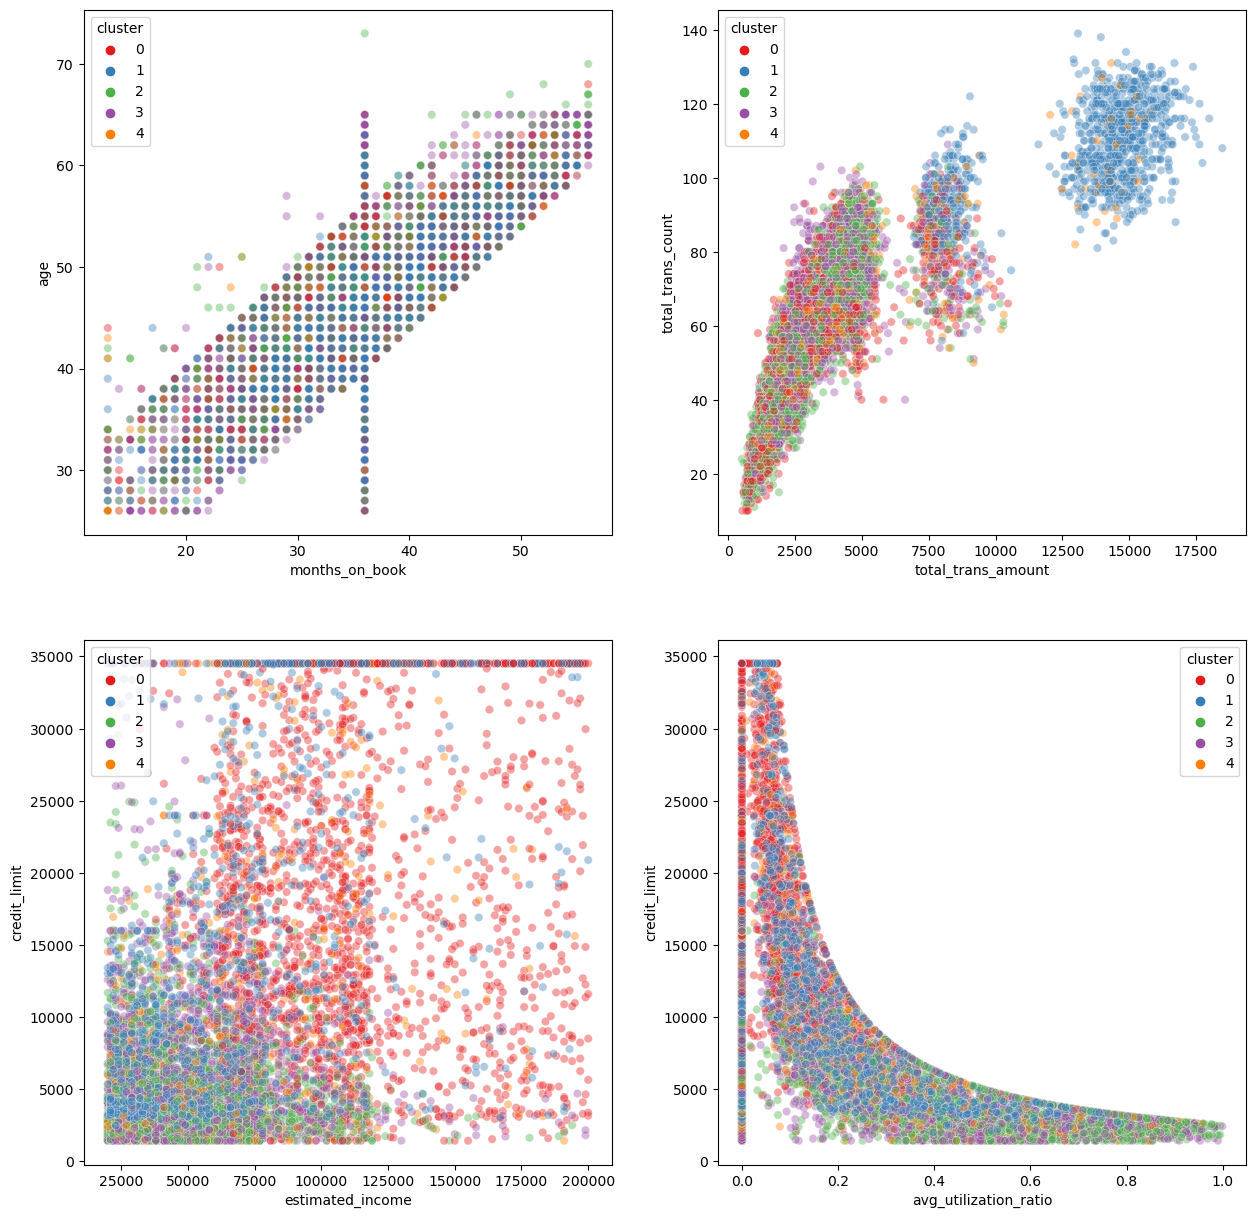

In [35]:
# Checking relationship between months on book and age
#High corr variable
high_corr = [['months_on_book', 'age'], ['total_trans_amount', 'total_trans_count'],
             ['estimated_income', 'credit_limit'], ['avg_utilization_ratio', 'credit_limit']]

#loop the vars to plot scatter plot
fig = plt.figure(figsize=(15,15))
for i, pair in enumerate(high_corr):
    ax = fig.add_subplot(2,2,i+1)
    sns.scatterplot(data=customers_modif, x=pair[0], y=pair[1], hue='cluster',
                    palette='Set1', alpha=0.4, ax=ax)
plt.show()

Based on the scatter plots, we can draw the following conclusions about the clusters and their characteristics:

- Age and Months_On_Book: Cluster 3 are points usually concentrated on the middle of the graph. These are people with moderate age and have been on the books for moderate amount of time. Other clusters are both on the start and end of the graph. 

- Total_Transaction_Amount and Total_Transaction_Count: Cluster 1 has the highest tranction amount and count whereas cluster mostly has the lowest transaction amount and count

- Credit_Limit and Estimated_Income: Cluster 0 has concentration with high income and high credit limit. Cluster two has low income and low credit limits. Cluster 1 are mostly concentrated with low income and low credit limit

- Credit_Limit and Average_Utilization_Ratio: Cluster two has high utilization ration and low credit limits. cluster 0 and 1 have low utilization ratio and high credit limit.

We will now focus on the categorical variables gender, education_level, and marital_status to gain an understanding of how they impact the cluster distribution. We will use the pandas.crosstab function to analyze these variables. This function computes the frequency of one variable given another through cross-tabulation.



/tmp/ipykernel_6613/2629632028.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_6613/2629632028.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_6613/2629632028.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


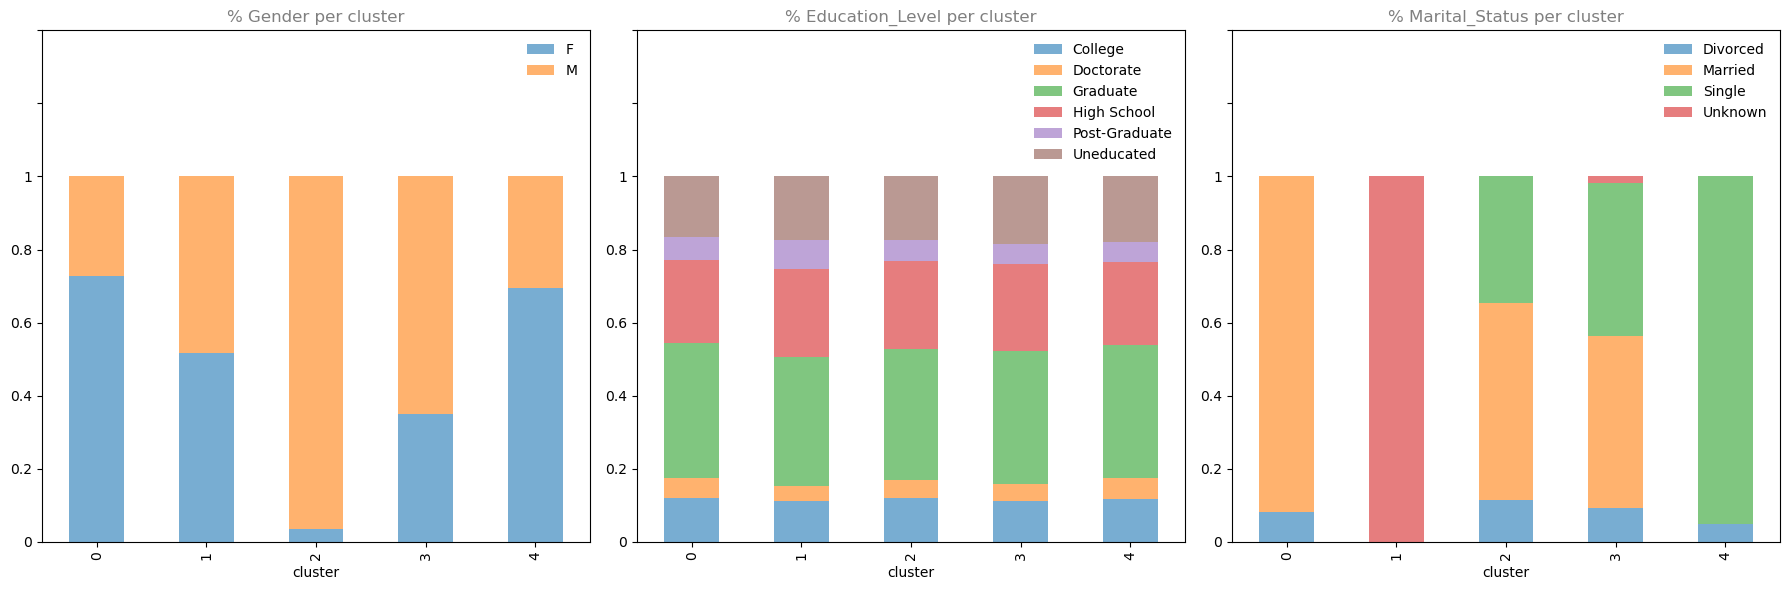

In [83]:
cat_columns = customers.select_dtypes(include=['object'])
fig = plt.figure(figsize=(18,6))
for i, col in enumerate(cat_columns):
    df = pd.crosstab(index=customers['cluster'], columns=customers[col], values=customers[col],
                     aggfunc='size', normalize='index')
    ax = fig.add_subplot(1,3, i+1)
    df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f"% {col.title()} per cluster", alpha=0.5)
    ax.set_ylim(0,1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)
    
plt.tight_layout()
plt.show()

## Conclusion
As demanded by the company, i now have listed the most important characteristics of each cluster, also provided suggestions and insights into each one of them.

### Cluster 0

**Characteristics**: Mostly women; mostly married; high income; high credit limit; low transaction amount and count; low utilization ratio.

**Insight**: Married women with high income but low usage, they could be incentivised with high volume spent on the card, but do not use it on a daily basis. Could be incentivised to spend more.

### Cluster 1

**Characteristics**: Well divided gender; Marriage status 100% unknown; relatively younger and low dependent count; low contact with company; moderate credit limit and income; Spends amount and count high; low utilization

**Insight**: People with high money and spending but do not use to on daily basis. Could be rewarded to use more.

### Cluster 2

**Characteristics**: Mostly men; high age; relatively low dependency; longer with the company; low income; low credit limit; low transaction amount and count; high utlization ratio.

**Insight**: Usually old age people with long time with the company and low dependents and use card often. They could be rewarded to spend more money. 

### Cluster 3

**Characteristics**: Relatively more men; moderate age; low dependents; low income, credit limit, transaction amount and count; moderate utilization.

**Insight**: They are people with low income and high utlization. They could be rewarded to spend more money

### Cluster 4

**Characteristics**: Mostly single females; relatively low age and high dependents; moderate income and credit limit; spends and counts of transactions are low; moderate utilization.

**Insight**: They are single female with moderate income and utilize moderately. They could be incentivised to spend and use more.
